In [1]:
import csv
import tensorflow as tf
import numpy as np
import os
import re
import random
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#!unzip /literature.zip -d /tmp/

In [3]:
#!unzip /music.zip -d /tmp/

In [4]:
vocab_size = 25000
embedding_dim = 16
max_length = 30 #num of words 
trunc_type='post' #truncate at the end
padding_type='post' #padding at the end
oov_tok = "<OOV>"
training_portion = .8  #80% training 20 testing

In [5]:
#stopwords = sanitisation
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))


153


### Literature training 
(no auto validation from "predict" folders)

In [6]:
def get_sentences(text, max_len=120):
    sentences = []
    #words = [*filter(lambda word: word not in stopwords, re.split('[^a-zа-я]+', text.lower()))] #uncomment to sanitise text
    words = re.split('[^a-zа-я]+', text.lower())
    for i in range(0, len(words), max_len):
        sentences.append(' '.join(words[i:i + max_len]))
    return sentences

In [7]:
train_labels = []
train_sentences = []

folder = 'literature/train_texts'
#folder = 'music/train_json'
for label in os.listdir(folder):
    p = os.path.join(folder, label)
    if os.path.isdir(p):
        for file in os.listdir(p):
            file = os.path.join(p, file)
            with open(file, 'r',  encoding='utf-8', errors='ignore') as f:
                for sentence in get_sentences(f.read()):
                    train_labels.append(label)
                    train_sentences.append(sentence)
####################                    
train_zip = zip(train_labels, train_sentences)  #uncomment to RANDOM shuffle data, see end page for refresh on zip/shuffle
train_zip_list = list(train_zip)
random.shuffle(train_zip_list)
train_labels_tuple, train_sentences_tuple = zip(*train_zip_list)
train_labels = list(train_labels_tuple)
train_sentences = list(train_sentences_tuple)
###################################


# validation_labels = []
# validation_sentences = []

# folder = 'literature/predict_texts'
# #folder = 'music/predict_json'
# for label in os.listdir(folder):
#     p = os.path.join(folder, label)
#     if os.path.isdir(p):
#         for file in os.listdir(p):
#             file = os.path.join(p, file)
#             with open(file, 'r',  encoding='utf-8', errors='ignore') as f:
#                 for sentence in get_sentences(f.read()):
#                     validation_labels.append(label)
#                     validation_sentences.append(sentence)
# #################                    
# val_zip = zip(validation_labels,validation_sentences)
# val_zip_list =list(val_zip)
# random.shuffle(val_zip_list)
# val_labels_tuple, val_sentences_tuple = zip(*val_zip_list)
# validation_labels = list(val_labels_tuple)
# validation_sentences = list(val_sentences_tuple)



# print(len(train_sentences))
# print(len(train_labels))
# print(len(validation_sentences))
# print(len(validation_labels))
# print(train_labels[0])
# print(train_sentences[0])


In [8]:
training_portion = 0.99
train_size = int(len(train_sentences) * training_portion)

validation_sentences = train_sentences[train_size:]
validation_labels = train_labels[train_size:]

train_sentences = train_sentences[:train_size]
train_labels = train_labels[:train_size]

print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))
print(train_labels[0])
print(train_sentences[0])

2646
2646
27
27
joyce
lookingglass of a servant being the symbol of irish art is deuced good buck mulligan kicked stephen s foot under the table and said with warmth of tone wait till you hear him on hamlet haines well i mean it haines said still speaking to stephen i was just thinking of it when that poor old creature came in would i make any money by it stephen asked haines laughed and as he took his soft grey hat from the holdfast of the hammock said i don t know i m sure he strolled out to the doorway buck mulligan bent across to stephen and said with coarse vigour you put your hoof in it now what did you say


### Music training

In [10]:
"""MUSIC"""
train_labels = []
train_sentences = []

folder = 'music/train_json'
for label in os.listdir(folder):
    p = os.path.join(folder, label)
    if os.path.isdir(p):
        for file in os.listdir(p):
            file = os.path.join(p, file)
            with open(file, 'r',  encoding='utf-8', errors='ignore') as f:
                for sentence in json.loads(f.read()):
                    train_labels.append(label)
                    train_sentences.append(sentence)
####################                    
train_zip = zip(train_labels, train_sentences)  #uncomment to RANDOM shuffle data, see end page for refresh on zip/shuffle
train_zip_list = list(train_zip)
random.shuffle(train_zip_list)
train_labels_tuple, train_sentences_tuple = zip(*train_zip_list)
train_labels = list(train_labels_tuple)
train_sentences = list(train_sentences_tuple)
###################################


validation_labels = []
validation_sentences = []

folder = 'music/predict_json'
for label in os.listdir(folder):
    p = os.path.join(folder, label)
    if os.path.isdir(p):
        for file in os.listdir(p):
            file = os.path.join(p, file)
            with open(file, 'r',  encoding='utf-8', errors='ignore') as f:
                for sentence in json.loads(f.read()):
                    validation_labels.append(label)
                    validation_sentences.append(sentence)
#################                    
val_zip = zip(validation_labels,validation_sentences)
val_zip_list =list(val_zip)
random.shuffle(val_zip_list)
val_labels_tuple, val_sentences_tuple = zip(*val_zip_list)
validation_labels = list(val_labels_tuple)
validation_sentences = list(val_sentences_tuple)



# print(len(train_sentences))
# print(len(train_labels))
# print(len(validation_sentences))
# print(len(validation_labels))
# print(train_labels[0])
# print(train_sentences[0])

In [11]:
training_portion = 0.99
train_size = int(len(train_sentences) * training_portion)

validation_sentences = train_sentences[train_size:]
validation_labels = train_labels[train_size:]

train_sentences = train_sentences[:train_size]
train_labels = train_labels[:train_size]

print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))
print(train_labels[0])
print(train_sentences[0])

15814
15814
160
160
chopin
['G4ZE4MG3ZC3C2', 'G4E4MG3C3', 'G4E4MG3C3', 'C5E4MC4C3']


### Tokenize text/music

In [12]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
#print(word_index)
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(train_padded[0].shape)
print(type(train_padded[0]))
btext= train_padded[0] #for testing prediction below
print(len(train_sequences[0]))
print(len(train_padded[0]))
print('train_sequences[0]=', train_sequences[0])
print('\n')
print('train_padded[0]=', train_padded[0])

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

(30,)
<class 'numpy.ndarray'>
4
30
train_sequences[0]= [6784, 4338, 4338, 6785]


train_padded[0]= [6784 4338 4338 6785    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
13
30
5
30


In [13]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)


160
(160, 30)


In [14]:
label_tokenizer = Tokenizer()
# label_tokenizer.fit_on_texts(train_labels + validation_labels)
label_tokenizer.fit_on_texts(train_labels)
label_index = label_tokenizer.word_index
print(label_index)
print(len(label_index))
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[10])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)


{'bthvn': 1, 'mozart': 2, 'chopin': 3, 'bach': 4}
4
[3]
[2]
[1]
(15814, 1)
[4]
[1]
[1]
(160, 1)


### Architecture and Learning

In [15]:
num_of_output_neurons = len(label_index)+1 #n+1 classes!!!!!!!!!!!!!!!!
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(num_of_output_neurons, activation='softmax') #n+1 classes!!!!!!!!!!!!!!!!!!!!!!!
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 16)            400000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125       
Total params: 400,533
Trainable params: 400,533
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 15814 samples, validate on 160 samples
Epoch 1/30
15814/15814 - 3s - loss: 1.2934 - accuracy: 0.4425 - val_loss: 1.0209 - val_accuracy: 0.6500
Epoch 2/30
15814/15814 - 2s - loss: 0.9314 - accuracy: 0.6331 - val_loss: 0.8309 - val_accuracy: 0.6875
Epoch 3/30
15814/15814 - 2s - loss: 0.7656 - accuracy: 0.7117 - val_loss: 0.7673 - val_accuracy: 0.7250
Epoch 4/30
15814/15814 - 2s - loss: 0.6489 - accuracy: 0.7675 - val_loss: 0.7135 - val_accuracy: 0.7500
Epoch 5/30
15814/15814 - 2s - loss: 0.5566 - accuracy: 0.8059 - val_loss: 0.6861 - val_accuracy: 0.7563
Epoch 6/30
15814/15814 - 2s - loss: 0.4794 - accuracy: 0.8375 - val_loss: 0.6694 - val_accuracy: 0.7875
Epoch 7/30
15814/15814 - 2s - loss: 0.4196 - accuracy: 0.8606 - val_loss: 0.6486 - val_accuracy: 0.7688
Epoch 8/30
15814/15814 - 2s - loss: 0.3692 - accuracy: 0.8797 - val_loss: 0.6401 - val_accuracy: 0.7750
Epoch 9/30
15814/15814 - 2s - loss: 0.3310 - accuracy: 0.8913 - val_loss: 0.6534 - val_accuracy: 0.7875
Epoch 10/30
1581

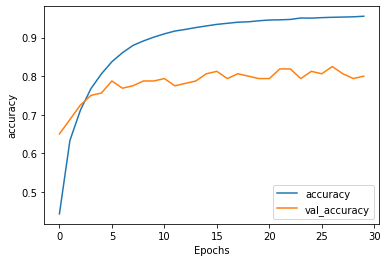

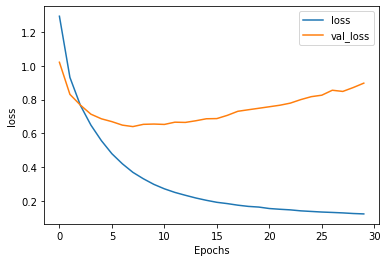

In [17]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
"""Text decoder"""
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [41]:
#btext is taken from Tokenizer code above, it's a coded text passage
print(type(btext))
print(btext)
print(btext.shape)
print(decode_sentence(btext))

<class 'numpy.ndarray'>
[6789   15   13   15   71   24  230   24  136   26    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(30,)
c5g4e4c4e3 c4 b3 c4 e4c3 d3 g3e3 d3 c4e3 c3 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [20]:
#Joyce, Scott, Homer from predict_texts folder
sentences = ["Right. Bravo Lancaster! The red rose wins. Come on now, York! Forge ahead! Jack Lawton looked over from his side. The little silk badge with the red rose on it looked very rich because he had a blue sailor top on. Stephen felt his own face red too, thinking of all the bets about who would get first place in elements, Jack Lawton or he. Some weeks Jack Lawton got the card for first and some weeks he got the card for first. His white silk badge fluttered and fluttered as he worked at the next sum and heard Father Arnall's voice. Then all his eagerness passed away and he felt his face quite cool. He thought his face must be white because it felt so cool. He could not get out the answer for the sum but it did not matter. White roses and red roses: those were beautiful colours to think of. And the cards for first place and second place and third place were beautiful colours too: pink and cream and lavender. Lavender and cream and pink roses were beautiful to think of. Perhaps a wild rose might be like those colours and he remembered the song about the wild rose blossoms on the little green place. But you could not have a green rose. But perhaps somewhere in the world you could. ",
             "Crossing himself, as he viewed the dark mass of rolling waters, incolour as in duality unlike those of any other lake, the traveller shuddered as he remembered that beneath these sluggish waves lay the once proud cities of the plain, whose grave was dug by the thunder of the heavens, or the eruption of subterraneous fire, and whose remains were hid, even by that sea which holds no living fish in its bosom, bears no skiff on its surface, and, as if its own dreadful bed were the only fit receptacle for its sullen waters, sends not, like other lakes, a tribute to the ocean. The whole land around, as in the days of Moses, was “brimstone and salt; it is not sown, nor beareth, nor any grass groweth thereon.” The land as well as the lake might be termed dead, as producing nothing having resemblance to vegetation, and even the very air was entirely devoid of its ordinary winged inhabitants, deterred probably by the odour of bitumen and sulphur which the burning sun exhaled from the waters of the lake in steaming clouds, frequently assuming the appearance of waterspouts. Masses of the slimy and sulphureous substance called naphtha, which floated idly on the sluggish and sullen waves, supplied those rolling clouds with new vapours, and afforded awful testimony to the truth of the Mosaic history.",
            "Then answered the slayer of Argus, guide and guardian, Sir, you are tempting me and playing upon my youth, but you shall not move me, for you are offering me presents without the knowledge of Achilles whom I fear and hold it great guiltless to defraud, lest some evil presently befall me; but as your guide I would go with you even to Argos itself, and would guard you so carefully whether by sea or land, that no one should attack you through making light of him who was with you. The bringer of good luck then sprang on to the chariot, and seizing the whip and reins he breathed fresh spirit into the mules and horses. When they reached the trench and the wall that was before the ships, those who were on guard had just been getting their suppers, and the slayer of Argus threw them all into a deep sleep. "]

# sentences = [['E5ZD4', 'G5', 'A4', 'E5Z', 'G5G4Z', 'E5Z', 'A4', 'G5', 'E5ZD4', 'G5', 'B4', 'E5Z', 'E5B4Z', 'D5B4', 'B4ZE4', 'A4', 'G4Z', 'A4', 'B4E4', 'B4Z', 'G4Z', 'B4', 'A4F4Z', 'B4G4Z'],
#              ['B2Z', 'B4ZG3', 'D5', 'E5E4', 'E5Z', 'G5B3Z', 'A4Z', 'G5ZE4']]
#sentences = [["E4", "D4", "C4", "D4G3E3C3", "C4", "D4", "C4", "D4G3E3C3", "C4", "B3", "C4", "A4", "F4"], ["G4G3D3", "B4", "D5B2", "F5G2", "E5B2", "F5E5D3B2", "G4F3", "B4E3", "D5F3"]]
print('len(sentences)=',len(sentences))
tokenized_sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(tokenized_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = model.predict(padded)
print(predictions)
print(label_index)
for prediction in predictions:
    winning_index = np.argmax(prediction)
    print('winning_index=',winning_index)
    for name, index in label_index.items():
        if index==winning_index:
            print(name, 'prob=', prediction[index]) 


len(sentences)= 3
[[1.8062688e-05 5.6107598e-04 6.0223782e-01 1.5431750e-01 2.4286562e-01]
 [1.8062688e-05 5.6107598e-04 6.0223782e-01 1.5431750e-01 2.4286562e-01]
 [1.8062688e-05 5.6107598e-04 6.0223782e-01 1.5431750e-01 2.4286562e-01]]
{'bthvn': 1, 'mozart': 2, 'chopin': 3, 'bach': 4}
winning_index= 2
mozart prob= 0.6022378
winning_index= 2
mozart prob= 0.6022378
winning_index= 2
mozart prob= 0.6022378


In [19]:
def get_attention_words(text, max_len):
    all_words = re.split('\W+', text)
    result = []
    for i in range(0, len(all_words), max_len):
        result.append(all_words[i:i + max_len])
    return result

In [43]:
for window in get_attention_words('qweqwe asdad. qwee??? .... asdasQWEWQ. a adf acvf acmnnn', 2):
    print(window)

['qweqwe', 'asdad']
['qwee', 'asdasQWEWQ']
['a', 'adf']
['acvf', 'acmnnn']


In [2]:
a=[1,2,3,4,5,6,7,8,9,10]
for i in range(0,len(a),3):
    print(i)

0
3
6
9


In [20]:
def walk_dir(folder):
    result = []
    for label in os.listdir(folder):
        p = os.path.join(folder, label)
        if os.path.isdir(p):
            for filename in os.listdir(p):
                file = os.path.join(p, filename)
                with open(file, 'r',  encoding='utf-8', errors='ignore') as f:
                    result.append((label, filename, f.read()))
    return result

In [21]:
def get_scores(predictions):
    scores = {}
    for prediction in predictions:
        winner_idx = np.argmax(prediction)
        scores[winner_idx] = scores.get(winner_idx, 0) + 1
    return scores

In [23]:
#folder = 'literature/predict_texts'
folder = 'music/predict_json_60'
count_correct = 0
count_all = 0
for name, filename, content in walk_dir(folder):
    sentences = get_attention_words(content, max_length)
    tokenized_sequences = tokenizer.texts_to_sequences(sentences)
    padded = pad_sequences(tokenized_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    predictions = model.predict(padded)
    scores = get_scores(predictions)
    names = {idx: name for name, idx in label_index.items()}
    sorted_score = sorted(scores.items(), key=lambda x: -x[1])
    print(name, filename)
    for label, score in sorted_score:
        print(f'{names[label]} -> {score}')
    winner_name = names[sorted_score[0][0]]
    count_all += 1
    count_correct += name == winner_name
    print('CORRECT' if name == winner_name else 'WRONG')
    print()
print(f'TOTAL: correct {count_correct} / {count_all}')

bach WTCII09A.json
bach -> 43
chopin -> 1
CORRECT

bach Wtcii09b.json
bach -> 12
bthvn -> 1
CORRECT

bach Wtcii10a.json
bach -> 54
chopin -> 5
mozart -> 1
CORRECT

bach Wtcii10b.json
bach -> 29
mozart -> 3
bthvn -> 2
chopin -> 2
CORRECT

bach Wtcii11a.json
bach -> 27
mozart -> 1
chopin -> 1
bthvn -> 1
CORRECT

bach Wtcii11b.json
bach -> 19
bthvn -> 2
CORRECT

bach WTCII12A.json
bach -> 28
mozart -> 5
CORRECT

bach Wtcii12b.json
bach -> 23
CORRECT

bach WTCII13A.json
bach -> 23
mozart -> 6
chopin -> 2
bthvn -> 1
CORRECT

bach Wtcii13b.json
bach -> 24
CORRECT

bach WTCII21A.json
bach -> 65
mozart -> 5
CORRECT

bach Wtcii21b.json
bach -> 18
mozart -> 1
CORRECT

bach WTCII22A.json
bach -> 22
CORRECT

bach Wtcii22b.json
bach -> 30
bthvn -> 1
CORRECT

bach WTCII23A.json
bach -> 25
mozart -> 1
chopin -> 1
CORRECT

bthvn Piano Sonata n08 op13 1mov.json
bthvn -> 38
bach -> 37
chopin -> 21
mozart -> 5
CORRECT

bthvn Piano Sonata n08 op13 3mov.json
bach -> 34
chopin -> 12
bthvn -> 4
mozart -> 3
W

In [0]:
#Joyce, Scott, Homer from predict_texts folder
sentences = ["Right. Bravo Lancaster! The red rose wins. Come on now, York! Forge ahead! Jack Lawton looked over from his side. The little silk badge with the red rose on it looked very rich because he had a blue sailor top on. Stephen felt his own face red too, thinking of all the bets about who would get first place in elements, Jack Lawton or he. Some weeks Jack Lawton got the card for first and some weeks he got the card for first. His white silk badge fluttered and fluttered as he worked at the next sum and heard Father Arnall's voice. Then all his eagerness passed away and he felt his face quite cool. He thought his face must be white because it felt so cool. He could not get out the answer for the sum but it did not matter. White roses and red roses: those were beautiful colours to think of. And the cards for first place and second place and third place were beautiful colours too: pink and cream and lavender. Lavender and cream and pink roses were beautiful to think of. Perhaps a wild rose might be like those colours and he remembered the song about the wild rose blossoms on the little green place. But you could not have a green rose. But perhaps somewhere in the world you could. ",
             "Crossing himself, as he viewed the dark mass of rolling waters, incolour as in duality unlike those of any other lake, the traveller shuddered as he remembered that beneath these sluggish waves lay the once proud cities of the plain, whose grave was dug by the thunder of the heavens, or the eruption of subterraneous fire, and whose remains were hid, even by that sea which holds no living fish in its bosom, bears no skiff on its surface, and, as if its own dreadful bed were the only fit receptacle for its sullen waters, sends not, like other lakes, a tribute to the ocean. The whole land around, as in the days of Moses, was “brimstone and salt; it is not sown, nor beareth, nor any grass groweth thereon.” The land as well as the lake might be termed dead, as producing nothing having resemblance to vegetation, and even the very air was entirely devoid of its ordinary winged inhabitants, deterred probably by the odour of bitumen and sulphur which the burning sun exhaled from the waters of the lake in steaming clouds, frequently assuming the appearance of waterspouts. Masses of the slimy and sulphureous substance called naphtha, which floated idly on the sluggish and sullen waves, supplied those rolling clouds with new vapours, and afforded awful testimony to the truth of the Mosaic history.",
            "Then answered the slayer of Argus, guide and guardian, Sir, you are tempting me and playing upon my youth, but you shall not move me, for you are offering me presents without the knowledge of Achilles whom I fear and hold it great guiltless to defraud, lest some evil presently befall me; but as your guide I would go with you even to Argos itself, and would guard you so carefully whether by sea or land, that no one should attack you through making light of him who was with you. The bringer of good luck then sprang on to the chariot, and seizing the whip and reins he breathed fresh spirit into the mules and horses. When they reached the trench and the wall that was before the ships, those who were on guard had just been getting their suppers, and the slayer of Argus threw them all into a deep sleep. "]

# sentences = [['E5ZD4', 'G5', 'A4', 'E5Z', 'G5G4Z', 'E5Z', 'A4', 'G5', 'E5ZD4', 'G5', 'B4', 'E5Z', 'E5B4Z', 'D5B4', 'B4ZE4', 'A4', 'G4Z', 'A4', 'B4E4', 'B4Z', 'G4Z', 'B4', 'A4F4Z', 'B4G4Z'],
#              ['B2Z', 'B4ZG3', 'D5', 'E5E4', 'E5Z', 'G5B3Z', 'A4Z', 'G5ZE4']]
# sentences = [["E4", "D4", "C4", "D4G3E3C3", "C4", "D4", "C4", "D4G3E3C3", "C4", "B3", "C4", "A4", "F4"], ["G4G3D3", "B4", "D5B2", "F5G2", "E5B2", "F5E5D3B2", "G4F3", "B4E3", "D5F3"]]
print('len(sentences)=',len(sentences))
tokenized_sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(tokenized_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = model.predict(padded)
print(predictions)
print(label_index)
for prediction in predictions:
    winning_index = np.argmax(prediction)
    print('winning_index=',winning_index)
    for name, index in label_index.items():
        if index==winning_index:
            print(name, 'prob=', prediction[index]) 


In [0]:
scores_dict={}
for prediction in predictions:
    i=1
    for key in label_index.keys():
        scores_dict[key] = prediction[i]
        #print( 'author {} (prob= {})'.format(key, prediction[i]) )
        i+=1
    print('\n')
    #print((scores_dict))
    scores_list = [(k,v) for k,v in scores_dict.items()]
    sorted_scores_list = sorted(scores_list, key=lambda x: -x[1]) #referesh tute on dict vals sorting at bottom page
    print(scores_list,'\n')
    print('sorted_scores_list=', sorted_scores_list)
    for pair in sorted_scores_list:
        print('author {} (prob = {})'.format(pair[0], pair[1])) #HOW TO ROUND?????????????????????
    print('--------------------------')

    



[('homer', 2.9850236e-05), ('dickens', 0.0028007026), ('shakespeare', 5.2108357e-05), ('joyce', 0.9818293), ('wscott', 0.015284327), ('chaucer', 1.4820286e-06)] 

sorted_scores_list= [('joyce', 0.9818293), ('wscott', 0.015284327), ('dickens', 0.0028007026), ('shakespeare', 5.2108357e-05), ('homer', 2.9850236e-05), ('chaucer', 1.4820286e-06)]
author joyce (prob = 0.9818292856216431)
author wscott (prob = 0.015284326858818531)
author dickens (prob = 0.0028007025830447674)
author shakespeare (prob = 5.2108356612734497e-05)
author homer (prob = 2.9850236387574114e-05)
author chaucer (prob = 1.4820285514360876e-06)
--------------------------


[('homer', 0.020491187), ('dickens', 0.0023181175), ('shakespeare', 0.00023613498), ('joyce', 0.015311225), ('wscott', 0.96125203), ('chaucer', 0.0003813059)] 

sorted_scores_list= [('wscott', 0.96125203), ('homer', 0.020491187), ('joyce', 0.015311225), ('dickens', 0.0023181175), ('chaucer', 0.0003813059), ('shakespeare', 0.00023613498)]
author wsco

### Embedding visualisation
http://projector.tensorflow.org/
Open the Embedding Projector (this can also run in a local TensorBoard instance).

Click on "Load data".

Upload the two files created below: vecs.tsv and meta.tsv.

The embeddings we trained will now be displayed. You can search for words to find their closest neighbors. For example, try searching for "beautiful". You may see neighbors like "wonderful".

In [70]:
"""retrieve the word embeddings learned during training. This will be a matrix of shape (vocab_size, embedding-dimension)."""
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 

(25000, 16)


In [71]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

KeyError: 22274

In [0]:
import io

#encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
    vec = weights[num+1] # skip 0, it's padding.
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

NameError: name 'encoder' is not defined

In [0]:
## REFERESHER code

In [0]:
"""ZIP RANDOM SHUFFLE refresher Tute"""
coordinate = ['x', 'y', 'z']
value = [3, 4, 5]

result = zip(coordinate, value)
result_list = list(result)
print(result_list)

c, v =  zip(*result_list)
print('c =', c)
print('v =', v)
c_list = list(c)
print('c_list=', c_list)

random.shuffle(result_list)
print(result_list)

[('x', 3), ('y', 4), ('z', 5)]
c = ('x', 'y', 'z')
v = (3, 4, 5)
c_list= ['x', 'y', 'z']
[('y', 4), ('z', 5), ('x', 3)]


In [0]:
"""DICT VALUES SORTING refresh tute"""
adict = {'a':30, 'z':20, 'c':10}
sum_of_values = sum(adict.values())
half_value_pairs = [(k,v / 2) for k,v in adict.items()]

print(half_value_pairs)
num2 = [v for v in adict.values()]
print('-half_value_pairs[0][1]=', -half_value_pairs[0][1])
print('num2=', num2)
top_by_key = sorted(half_value_pairs)
print('top_by_key=', top_by_key)
top_by_val = sorted(half_value_pairs,key= lambda x: -x[1]) #sorts by numbers in index [1] of each pair, -ve => big2small 
print('top_by_val=', top_by_val)

[('a', 15.0), ('z', 10.0), ('c', 5.0)]
-half_value_pairs[0][1]= -15.0
num2= [30, 20, 10]
top_by_key= [('a', 15.0), ('c', 5.0), ('z', 10.0)]
top_by_val= [('a', 15.0), ('z', 10.0), ('c', 5.0)]


In [0]:
#LIST SLICING refresh
alist=['a','b','c','d', 'e','f','g']
print(alist[:2])
print(alist[2:])

['a', 'b']
['c', 'd', 'e', 'f', 'g']


In [0]:
#SHIFT ATTENTION WINDOW THROUGH A LIST
alist=['a','b','c','d', 'e','f','g']
step = 2
list_len = len(alist)
print('list_len=',list_len)
distance = 0

while distance < list_len:
    result = alist[distance : distance+step]
    print(result)
    distance += step
    print('distance=',distance)

list_len= 7
['a', 'b']
distance= 2
['c', 'd']
distance= 4
['e', 'f']
distance= 6
['g']
distance= 8


In [3]:
#Scores dict
score_dict= {'a':0, 'b':0}
print(score_dict.keys())
alist=['a','b','c','g', 'a','a','b']

for letter in alist:
    if letter in score_dict.keys():
        score_dict[letter] += 1
print(score_dict)

dict_keys(['a', 'b'])
{'a': 3, 'b': 2}


In [7]:
score_dict['a']

3